# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('assamese.mat',0)
len(X), len(T)

(5704, 5704)

In [6]:
X,T = loaddata('bengali.mat',1)
len(X), len(T)

(8880, 8880)

In [7]:
X,T = loaddata('kannada.mat',2)
len(X),len(T)

(15135, 15135)

In [8]:
X,T = loaddata('malayalam.mat',3)
len(X),len(T)

(18272, 18272)

In [9]:
X,T = loaddata('punjabi.mat',4)
len(X),len(T)

(21083, 21083)

In [10]:
X,T = loaddata('rajasthani.mat',5)
len(X),len(T)

(24092, 24092)

In [11]:
X,T = loaddata('tamil.mat',6)
len(X),len(T)

(27027, 27027)

In [12]:
X,T = loaddata('telugu.mat',7)
len(X),len(T)

(29906, 29906)

In [13]:
X,T = loaddata('hindi.mat',8)
len(X),len(T)

(39070, 39070)

In [14]:
X,T = loaddata('gujrati.mat',9)
len(X),len(T)

(42544, 42544)

## Split Dataset

In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((34035, 39, 39), (8509, 39, 39))

## Convert 2D dataset to a 1D vector

In [16]:
batchSize=128
num_classes=10
epochs=10
imageRows, imageCols =39,39

In [17]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [18]:
input_shape

(39, 39, 1)

In [19]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [20]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(39, 39, 1..., kernel_regularizer=<keras.reg...)`
  """
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_si

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [23]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 34035 samples, validate on 8509 samples
Epoch 1/10
34035/34035 [==============================] - 35s 1ms/step - loss: 2.2515 - acc: 0.7235 - val_loss: 1.8538 - val_acc: 0.7521
Epoch 2/10
34035/34035 [==============================] - 31s 903us/step - loss: 1.1160 - acc: 0.9054 - val_loss: 0.9981 - val_acc: 0.8831
Epoch 3/10
34035/34035 [==============================] - 31s 907us/step - loss: 0.7291 - acc: 0.9396 - val_loss: 0.7090 - val_acc: 0.9154
Epoch 4/10
34035/34035 [==============================] - 31s 906us/step - loss: 0.5520 - acc: 0.9533 - val_loss: 0.6224 - val_acc: 0.9126
Epoch 5/10
34035/34035 [==============================] - 31s 909us/step - loss: 0.4714 - acc: 0.9581 - val_loss: 0.5508 - val_acc: 0.9310
Epoch 6/10
34035/34035 [==============================] - 31s 907us/step - loss: 0.4253 - acc: 0.9627 - val_loss: 0.9281 - val_acc: 0.8234
Epoch 7/10
34035/34035 [==============================] - 30s 883us/step - loss: 0.4065 - acc: 0.9629 - val_loss: 0.581

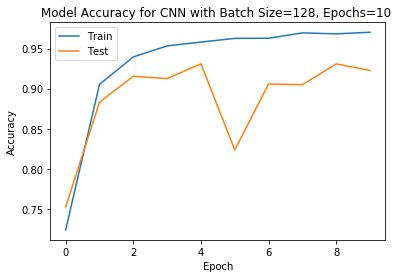

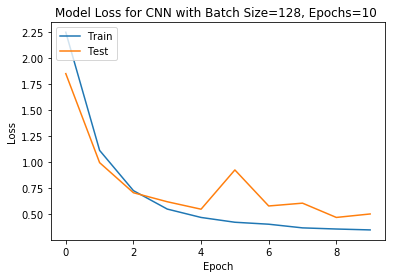

In [24]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [26]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu','Hindi','Gujrati'])

Confusion Matrix for Train Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    98.668814   0.002996   0.007959   0.042277   0.033252    0.021851   
Bengali      0.004765  81.864947   0.101837  15.392914   0.001882    0.009193   
Kannada      0.027896   0.025251  93.268466   4.457342   0.006190    0.020325   
Malayalam    0.028441   2.352047   0.996109  93.289214   0.006738    0.033698   
Punjabi      0.350276   0.003425   0.056455   0.003142  97.068197    0.170668   
Rajasthani   0.007564   0.007498   0.343927   0.426482   0.005523   95.345461   
Tamil        0.003488   0.188799   0.195431   2.664777   0.004376    0.026711   
Telugu       0.061709   0.010098   0.541758   1.463945   0.026920    0.254865   
Hindi        0.040895   0.041886   0.567660   4.251121   0.007000    0.294304   
Gujrati      0.056409   0.013208   0.038282   0.053097   0.011401    0.154433

In [27]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu','Hindi','Gujrati'])

Confusion Matrix for Test Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    97.868764   0.003540   0.010757   0.049739   0.024170    0.090039   
Bengali      0.003991  80.037504   0.122904  16.195168   0.002115    0.010547   
Kannada      0.061811   0.080273  90.218246   6.313779   0.008756    0.034086   
Malayalam    0.016752   3.403527   1.457458  87.767202   0.007857    0.092243   
Punjabi      0.471780   0.004478   0.014068   0.003373  96.722794    0.095995   
Rajasthani   0.012851   0.010749   0.680610   0.401412   0.015459   91.449142   
Tamil        0.003707   0.215988   0.508161   3.786544   0.004898    0.035750   
Telugu       0.096370   0.010144   0.360359   2.140763   0.036027    0.445093   
Hindi        0.117815   0.095886   0.794676   4.401559   0.008256    0.522172   
Gujrati      0.115270   0.018750   0.202365   0.074222   0.010406    0.305498 